# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Линейная регрессия":

https://clck.ru/32BVWe

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель линейной регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения линейной регрессии
5. Написать уравнение линейной регрессии
6. Визуализировать данные и полученное уравнение линейной регрессии
7. Оценивать полученную модель с помощью MSE, MAE, R2.
8. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

In [1]:
from google.colab import files
f = files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity.csv


In [2]:
import pandas as pd
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [13]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
x = df[['actual_productivity']]
y = df['targeted_productivity']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0.76670121, 0.7880425 , 0.75764317, 0.72439096, 0.71605691,
       0.71125246, 0.71837551, 0.76607958, 0.7650538 , 0.76398959,
       0.72765466, 0.70190804, 0.72216182, 0.69547061, 0.78808016,
       0.74417671, 0.72218269, 0.69506383, 0.73330442, 0.66431726,
       0.76112585, 0.77965808, 0.73315102, 0.66703701, 0.78533281,
       0.7683283 , 0.74413597, 0.72042415, 0.74356176, 0.7332827 ,
       0.7222883 , 0.7396764 , 0.76419833, 0.67931626, 0.68272809,
       0.74423743, 0.72226251, 0.72228031, 0.74419847, 0.71141999,
       0.6872241 , 0.75922507, 0.74414596, 0.71482259, 0.75408422,
       0.72807884, 0.66027802, 0.74419847, 0.7441377 , 0.7582804 ,
       0.74223617, 0.7331489 , 0.74488735, 0.74418341, 0.71704992,
       0.77604638, 0.78142631, 0.65585176, 0.74132373, 0.74419847,
       0.73391328, 0.74426425, 0.68713268, 0.73322146, 0.7551361 ,
       0.7051653 , 0.72226251, 0.77651456, 0.74426043, 0.74416442,
       0.71965888, 0.7002778 , 0.7479333 , 0.72218225, 0.67077

In [21]:
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1):  [0.21940831]
Свободный коэффицент уравнения w0: 0.5685836269324814


y = 0.57 + 0.22 * x

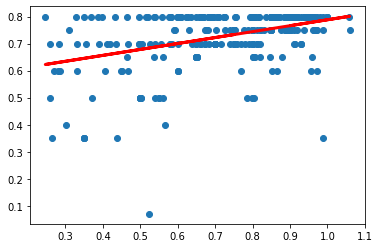

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3);
plt.show()     

In [23]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 0.062033617672486725
MSE: 0.00831242511310503
R2: 0.20656304536233894


R2 довольно маленькое, значит программа отработала не очень хорошо,
а MSE и MAE получились лучше, так как очень близки к нулю.
Уравнение: y = 0.57 + 0.22 * x